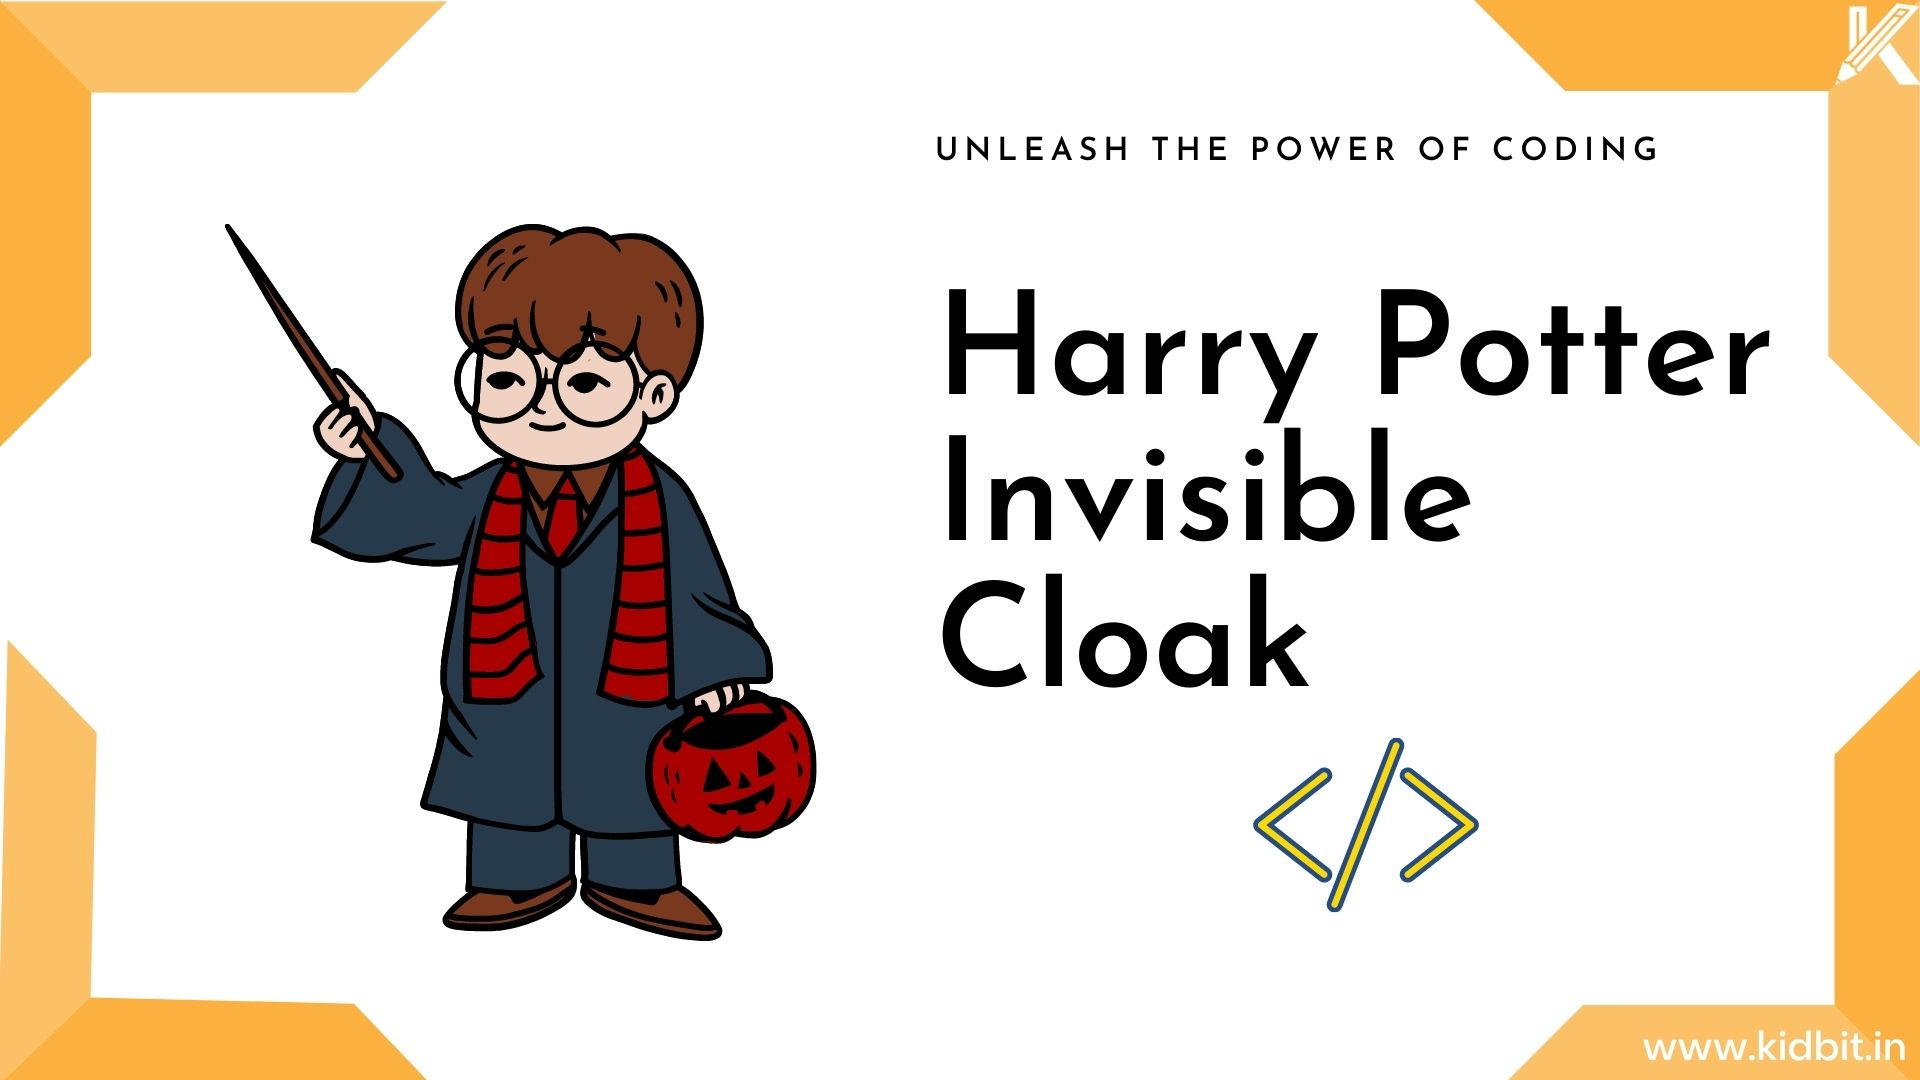

## We need 4 things to create magic today:

1. Python Editor - Woah !!! Thats where we are 

2. Single colour cloak - Multicolour is just too difficult

3. Webcam - How else would the computer see me ?

4. Confidence - Well , I did my morning prayers ;)

## Now that we know what we need, lets get to know the 5 magical steps for performing the spell:

1. Import the magical packages

2. Capture the background

3. Detect the Cloak

4. Apply the mask on the cloak to make it invisible

5. Stitch the different images and visualise the magic

In [9]:
import cv2 as ComputerVision
import matplotlib.pyplot as plotimage

In [10]:
 Capture = ComputerVision.VideoCapture(0)

In [11]:
# Store a single frame as background image
_, background = Capture.read()

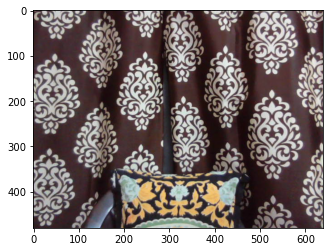

In [12]:
#Lets see what has been captured:
plotimage.imshow(ComputerVision.cvtColor(background, ComputerVision.COLOR_BGR2RGB))
plotimage.show()

In [ ]:
#FILTER
import numpy as np
open_kernel = np.ones((5, 5), np.uint8)
close_kernel = np.ones((7, 7), np.uint8)
dilation_kernel = np.ones((10, 10), np.uint8)
def remove_noise(mask):
    close_mask = ComputerVision.morphologyEx(mask, ComputerVision.MORPH_CLOSE, close_kernel)

    open_mask = ComputerVision.morphologyEx(close_mask, ComputerVision.MORPH_OPEN, open_kernel)

    dilation = ComputerVision.dilate(open_mask, dilation_kernel, iterations=1)

    return dilation

In [ ]:
while Capture.isOpened():
    ret, frame = Capture.read()  # Capture every frame
    
    # convert to hsv colorspace
    enhancedframe = ComputerVision.cvtColor(frame, ComputerVision.COLOR_BGR2HSV)
    
    #THIS IS WHERE YOU HAVE TO THINK WHILE YOU CREATE YOUR CLOAK AS IT DEPENDS ON THE COLOUR OF THE CLOAK
    lower_bound = np.array([110, 50, 50])
    upper_bound = np.array([130, 255, 255])
    
    # THIS IS WHERE A MASK COVERS YOUR CLOAK
    mask = ComputerVision.inRange(enhancedframe, lower_bound, upper_bound)
    mask = remove_noise(mask)
    ComputerVision.imshow("MASK", mask)
    
    #BITWISE_AND HELPS IN JOINING
    cloak = ComputerVision.bitwise_and(background, background, mask=mask)
    ComputerVision.imshow("AND", cloak)

    # create inverse mask to get the background
    #BITWISE_NOT JUST GIVES US THE REVERSE/INVERSE VALUE
    inverse_cloak = ComputerVision.bitwise_not(mask)
    ComputerVision.imshow("Inverse_mask", inverse_cloak)

    # Apply the inverse mask to take those region of the current frame where cloak is not present
    current_background = ComputerVision.bitwise_and(frame, frame, mask=inverse_cloak)

    # Combine cloak region and current_background region to get final frame
    output = ComputerVision.add(cloak, current_background)

    ComputerVision.imshow("Final output", output)

    if ComputerVision.waitKey(1) == ord('q'):
     break

In [ ]:
cap.release()
cv2.destroyAllWindows()